In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl

<div dir="rtl">
    
## אסון הטיטאניק

<div dir="rtl">  אוניית הדואר המלכותי טיטניק (באנגלית: RMS Titanic) הייתה אוניית נוסעים בריטית, הגדולה והמפוארת בעולם בשעתה ומכאן גם שמה ("עצום", "ענק"). אף על פי שסברו כי אוניית ענק שכמותה לעולם לא תטבע, טבעה ה"טיטניק" בהפלגת הבכורה שלה ב־15 באפריל 1912 לאחר שהתנגשה בקרחון. באסון נספו 1,517 בני אדם, בהם מפורסמים רבים, ורק 712 ניצלו. 

<div dir="rtl"> להלן dataframe בשם data. יש בdataframe 12 עמודות. אנחנו כרגע נתמקד ב-3 עמודות:
<br/>
intercept - עמודה של ה-1 עבור החותך
<br/>
sex - מגדר של הנוסע
<br/>
survived - האם שרד או לא. 1 אם שרד 0 אם לאו.

In [2]:
## The path to the file
path = r'..\Data'
file_name = 'titanic.csv'

In [3]:
## Extracting the data from the csv file into pandas
data = pd.read_csv(os.path.join(path, file_name))
data['intercept'] = np.ones(data.shape[0])
data.head(10)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,intercept
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1.0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1.0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1.0
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1.0
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1.0
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male,1.0
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female,1.0
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male,1.0
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female,1.0
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,(22),male,1.0


 <div dir="rtl"> נרצה לעשות ניתוח על סיכויי הישרדות של גברים ונשים. במקרה זה המשתנה המסביר שלנו הוא משתנה קטגרויאלי. העמודה שמציינת את המגדר היא sex. במקום שיהיה male ו-female נמיר את זה ל-0 ו -1.

In [4]:
data['gender_binary'] = data['sex'].apply(lambda x: 1 if x=='female' else 0)

In [5]:
data.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,intercept,gender_binary
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1.0,1
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1.0,1
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1.0,0
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1.0,1
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1.0,0


<div dir="rtl"> לפני שנעשה ניתוח של רגרסיה לוגיסטית נעשה ניתוח ויזואלי של הנתונים.

In [6]:
female_survived = data.loc[(data['gender_binary']==1)&(data['survived']==1),:].shape[0]
female_not_survived = data.loc[(data['gender_binary']==1)&(data['survived']==0),:].shape[0]
male_survived = data.loc[(data['gender_binary']==0)&(data['survived']==1),:].shape[0]
male_not_survived = data.loc[(data['gender_binary']==0)&(data['survived']==0),:].shape[0]



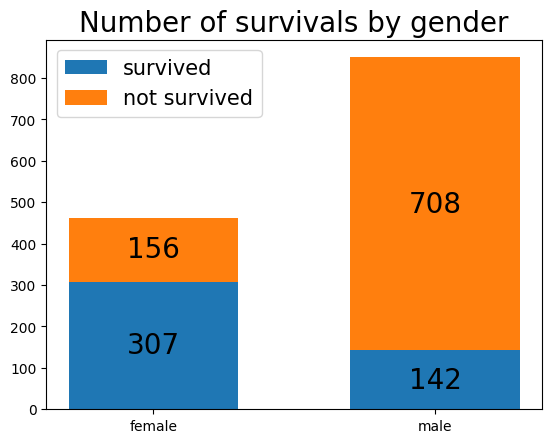

In [7]:
gender = ('female', 'male')
survival_counts = {
    'survived': np.array([female_survived, male_survived]),
    'not survived': np.array([female_not_survived, male_not_survived]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(2)

for surv, surv_count in survival_counts.items():
    p = ax.bar(gender, surv_count, width, label=surv, bottom=bottom)
    bottom += surv_count

    ax.bar_label(p, label_type='center', fontsize= 20)

ax.set_title('Number of survivals by gender', fontsize = 20)
ax.legend(fontsize= 15)

plt.show()

In [8]:
survival_rate_female = female_survived/(female_survived+female_not_survived)
survival_rate_male = male_survived/(male_survived+male_not_survived)

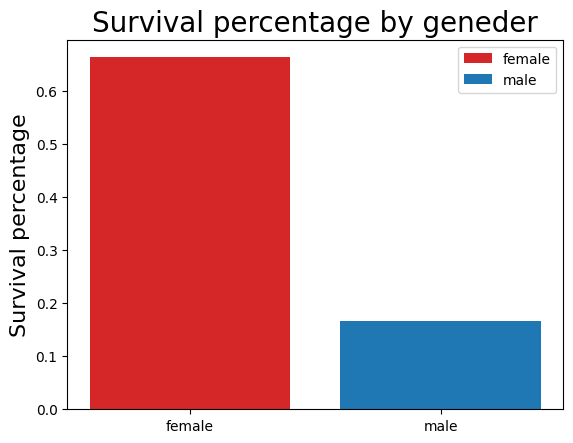

In [9]:
fig, ax = plt.subplots()

fruits = ['female', 'male']
counts = [survival_rate_female, survival_rate_male]

bar_labels = ['female', 'male']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_ylabel('Survival percentage', fontsize = 16)
ax.set_title('Survival percentage by geneder', fontsize = 20)
ax.legend()

plt.show()

 <div dir="rtl"> לפי הגרפים למעלה נראה כי שיעור השורדות גדול משיעור השורדים. זאת ועוד, אפילו שמספר הגברים שהיו על הספינה גדול משמעותית ממספר הנשים, מספר הנשים ששרדו היה גדול פי 2 ממספר הגברים ששרדו.

 <div dir="rtl"> כעת, נעבור לניתוח של רגרסיה לוגיסטית: 
כאשר הlogit של המשוואה שלנו היא:
    
$$ Logit(p) = intercept + b1*gender $$

In [15]:
# Create a linear regression model
model_logistic = sm.Logit(data['survived'], data[['intercept', 'gender_binary']])
# Fit the model
results_logistic = model_logistic.fit()
# Print summary statistics, including p-values for each coefficient
print(results_logistic.summary())

Optimization terminated successfully.
         Current function value: 0.517411
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1313
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            1
Date:                Tue, 24 Oct 2023   Pseudo R-squ.:                  0.1945
Time:                        09:47:18   Log-Likelihood:                -679.36
converged:                       True   LL-Null:                       -843.38
Covariance Type:            nonrobust   LLR p-value:                 2.572e-73
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -1.6066      0.092    -17.473      0.000      -1.787      -1.426
gender_binary     2.

<div dir="rtl"> ניתן לראות שהערך של הפרמטר של geneder_binary הוא 2.2836. בנוסף ניתן לראות שהתוצאה מובהקת לפי הערך בעמודה $P>|z|$. אבל מה המשמעות של 2.2836? 
    בשביל זה אנחנו צריכים נשתמש במושג חדש שנקרא Odds-Ratio.

<div dir="rtl"> בשיעור הקודם דיברנו על מונח שנקרא logit:
    
$$ Logit(p) = Log(\frac{p}{1-p}) = b_0 +b_1*x $$
    where
$$ p = \frac{1}{1+e^{b_0 + b_1*x}} $$    

<div dir="rtl">  הערך שבתוך ה-logit הוא מה שנקרא odds. 
    
    Odds  זה מונח שמתאר פי כמה יותר סביר שארוע יקרה על פני החלופה שלא יקרה. למשל:
    
אם בחברה A בוצעו 100 נסיעות מבחן ברכבים אוטונומיים וב-25 מהם התרחש אירוע בטיחות בעוד ש75 נסיעות האחרות התנהלו בבטיחות, ההסבתברות לנסיעה מסכונת היא 0.25 ואילו הOddsהוא:
    

$$ Odds =  \frac{25/100}{75/100} = \frac{1}{3} $$

<div dir="rtl"> אז למשל נרצה לדעת מה ה-odds להינצל עבור הנשים. תחילה נעשה תחזית ונמצא את הסיכוי להינצל ואז נחשב את הodds.

In [16]:
pred_df = pd.DataFrame([])
pred_df.loc[0,'intercept'] = 1
pred_df.loc[0,'gender_binary'] = 1
female_survive = results_logistic.predict(pred_df[['intercept', 'gender_binary']]).item()
female_survive

0.6630669546436274

<div dir="rtl"> קיבלנו שהסיכוי של אישה לשרוד הוא 0.663. לכן ה-odds הוא:

In [17]:
female_survive/(1-female_survive)

1.9679487179487083

 <div dir="rtl"> כלומר כמעט פי 2 יותר סביר שאישה תשרוד מאשר לא תשרוד.

<div dir="rtl">    
ניתן לחשב את הodds ידנית על ידי הזנת הערכים של המקדמים.
    
$$ Log(\frac{p}{1-p}) = b_0 +b1*gender $$
$$ Odds = \frac{p}{1-p} = e^{ b_0 +b1*gender} $$    
$$ Odds = e^{-1.606 + 2.2836*1} = 1.968 $$

   
## Odd-Ration

<div dir="rtl"> ה-Odds-Ratio בעצם זה יחס של Odds תחת שני ערכים שונים. למשל במקרה של משתנה קטגוריאלי זה היחס בין הodds של נשים מול הodds של גברים.החישוב הוא:

In [36]:
pred_df

,intercept,gender_binary
0,1.0,1.0


In [37]:
pred_df = pd.DataFrame([])
pred_df.loc[0,'intercept'] = 1
pred_df.loc[0,'gender_binary'] = 1

pred_df.loc[1,'intercept'] = 1
pred_df.loc[1,'gender_binary'] = 0

survive_prob = results_logistic.predict(pred_df[['intercept', 'gender_binary']])
survive_prob

0    0.663067
1    0.167059
dtype: float64

In [38]:
female_prob = survive_prob[0]
male_prob = survive_prob[1]
female_odds = female_prob/(1-female_prob)
male_odds = male_prob/(1-male_prob)
male_odds, female_odds

(0.20056497175141233, 1.9679487179487083)

In [39]:
female_odds/male_odds 

9.812026002166803

<div dir="rtl"> משמעות המספר הזה שהodds  של אישה לשרוד גדול פי 9.81 מגבר. 

<div dir="rtl"> 
    
## דוגמא

 <div dir="rtl">  במפעל להכנת בקבוקים משתשמים בשני סוגים של מכונות A ו-B. מכונה A היא מכונה חדישה יותר ולרוב נחשבת יותר אמינה. במפעל יש 100 מכונות מסוג A ו-100 מסוג B. לפעמים יש אירוע בטיחות כלשהו עם המכונה כאשר משהו משתבש במכונה. מניסיון עבר גורם היכול להשפיע על גורם כזה הוא גיל המכונה. 

<div dir="rtl"> גיל המכונה נמדד בחודשים.
<div dir="rtl">
להלן dataframe המתאר את הנתנונים של הבעיה. העמודות הן:
<div dir="rtl">    
Machine - סוג המכונה
<div dir="rtl">
month - גיל המכונה בחודשים
<div dir="rtl">    
safety_event - האם היה ארוע בטיחות או לאו

In [239]:
df_factory1 = df_factory.loc[:, ['Machine', 'month', 'safety_event']]

In [240]:
pkl.dump(df_factory1, open('../pkl/df_factory.pkl', 'wb'))

In [144]:
df_factory = pd.DataFrame([])
df_factory['Machine_binary'] = np.append(np.zeros(200), np.ones(200))
df_factory['Machine'] =  df_factory['Machine_binary'].apply(lambda x: 'A' if x==0 else 'B')
df_factory['month'] = np.append(np.random.randint(1,300,200),np.random.randint(1,300,200))
df_factory['intercept'] = np.ones(df_factory.shape[0])


In [146]:
df_factory = df_factory.sort_values(by= ['month'])
df_factory = df_factory.reset_index()
machine_years = np.array(df_factory['month'])
machine_type = np.array(df_factory['Machine_binary'])
df_factory.head()

,index,Machine_binary,Machine,month,intercept
0,296,1.0,B,1,1.0
1,264,1.0,B,1,1.0
2,246,1.0,B,2,1.0
3,195,0.0,A,4,1.0
4,343,1.0,B,4,1.0


In [222]:
b0, b1 , b2 = -8, 0.03, 2.2
probs = 1/(1+np.exp(-(b0 +  b1*machine_years + b2*machine_type)))

In [189]:
df_factory['safety_event']  = (np.random.rand(400)>1/(1+np.exp(b0 +  b1*machine_years + b2*machine_type))).astype(int)

In [242]:
df_factory = pkl.load( open('../pkl/df_factory.pkl', 'rb'))

In [248]:
df_factory['Machine_binary'] = df_factory['Machine'].apply(lambda x: 0 if x=='A' else 1)

<div dir="rtl">  קודם נסתכל על הנתונים ויזואלית

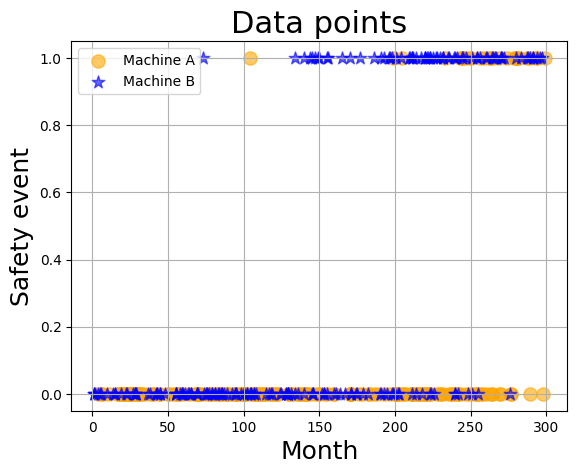

In [249]:
machine1 = 0
curr_df1 = df_factory.loc[df_factory['Machine_binary']==machine1, :]
machine2 = 1
curr_df2 = df_factory.loc[df_factory['Machine_binary']==machine2, :]

plt.figure()
plt.scatter(curr_df1['month'], curr_df1['safety_event'], label =  'Machine A', color = 'orange', s= 90, alpha = 0.6)
plt.scatter(curr_df2['month'], curr_df2['safety_event'], label =  'Machine B', color = 'blue', alpha = 0.6, marker = '*', s = 90)
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Safety event',  fontsize = 18)
plt.grid()
plt.title('Data points',  fontsize = 22)
plt.legend()
plt.show()

<div dir="rtl">  זה נראה שיש סיכוי יותר גדול למכונות ותיקות להגיע לארוע בטיחותי. בנוסף נראה שקיים הבדל בין המכונות. ננתח יותר לעומק. נתחיל לעשות רגרסיה לוגיסטית:

In [250]:
df_factory['intercept'] = np.ones(df_factory.shape[0])

In [251]:
model_logistic1 = sm.Logit(df_factory['safety_event'], df_factory[['intercept', 'Machine_binary', 'month']])
result_logistic1 = model_logistic1.fit()
print(result_logistic1.summary())

Optimization terminated successfully.
         Current function value: 0.305982
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           safety_event   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Oct 2023   Pseudo R-squ.:                  0.4559
Time:                        14:20:42   Log-Likelihood:                -122.39
converged:                       True   LL-Null:                       -224.93
Covariance Type:            nonrobust   LLR p-value:                 2.930e-45
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -8.2083      0.881     -9.322      0.000      -9.934      -6.482
Machine_binary   

<div dir="rtl"> ניתן לראות את הערכים של המקדמים והעובדה שהם מובהקים. נראה כי machine_binary הוא 2.3786, כלומר הLog Odds גדל ב2.3786 כעת עוברים ממכונה A למכונה B. 
    השיפוע של הmonth הוא 0.03 כלומר ככל שהכיל עולה כך גם ההסתברות לארוע בטיחותי. 

<div dir="rtl"> כעת נגיד את גרף הרגרסיה שקיבלנו עבור כל מכונה בנפרד. כך נוכל להתרשם גם מההבדל בין המכונות והקשר בין הגיל וארוע בטיחות

In [254]:
# predictions for machine A
x_vals = np.linspace(0, 500, 100)
data_predA = pd.DataFrame([])
data_predA['Machine_binary'] = np.zeros(x_vals.shape[0])
data_predA['intercept'] = np.ones(x_vals.shape[0])
data_predA['month'] = x_vals
data_predA['safety_event_prob'] = result_logistic1.predict(data_predA[['intercept', 'Machine_binary', 'month']])

# predictions for machine B
x_vals = np.linspace(0, 500, 100)
data_predB = pd.DataFrame([])
data_predB['Machine_binary'] = np.ones(x_vals.shape[0])
data_predB['intercept'] = np.ones(x_vals.shape[0])
data_predB['month'] = x_vals
data_predB['safety_event_prob'] = result_logistic1.predict(data_predB[['intercept', 'Machine_binary', 'month']])

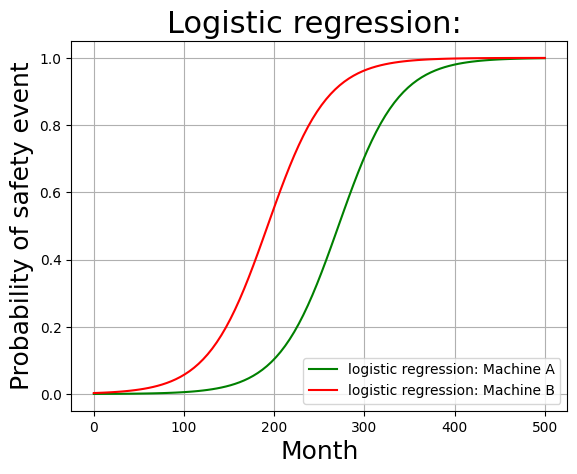

In [256]:
plt.figure()
plt.plot(data_predA['month'], data_predA['safety_event_prob'], label = 'logistic regression: Machine A', color = 'green')
plt.plot(data_predB['month'], data_predB['safety_event_prob'], label = 'logistic regression: Machine B', color = 'red')
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Probability of safety event',  fontsize = 18)
plt.grid()
plt.title('Logistic regression: ',  fontsize = 22)
plt.legend()
plt.show()

<div dir="rtl"> כעת, נחשב את הLog odds עבור כל מכונה כאשר גיל המכונה הוא  200 חודש.

In [258]:
pred_df1 = pd.DataFrame([])
pred_df1.loc[0,'intercept'] = 1
pred_df1.loc[0,'Machine_binary'] = 0
pred_df1.loc[0,'month'] = 200

pred_df1.loc[1,'intercept'] = 1
pred_df1.loc[1,'Machine_binary'] = 1
pred_df1.loc[1,'month'] = 200

safety_event_prob = result_logistic1.predict(pred_df1[['intercept', 'Machine_binary', 'month']])
safety_event_prob

0    0.103705
1    0.555232
dtype: float64

In [262]:
machine_A_prob = safety_event_prob[0]
machine_B_prob = safety_event_prob[1]
machine_A_prob, machine_B_prob 

(0.10370462633754647, 0.5552322627541582)

<div dir="rtl"> כלומר ההסתברות לארוע בטיחות עבור מכונה A בגיל 200 הוא 0.103
<div dir="rtl">
הסתברות לארוע בטיחות עבור מכונה B בגיל 200 הוא 0.555.
<div dir="rtl">    
מכאן נחשב את הlogs odds.
    

In [261]:
odds_ratioA = machine_A_prob/(1-machine_A_prob)
odds_ratioB = machine_B_prob/(1-machine_B_prob)
odds_ratioA, odds_ratioB

(0.1157036278272723, 1.2483645198555802)

## Odds - Ratio (OR)

<div dir="rtl">
זה בעצם מדד שמשווה את הodds עבור שני מקרים שונים. למשל, מקרה 1 מתאר את הסיכוי לארוע בטיחותי במכונה A כאשר המכונה כבר עובדת 200 חודשים. מקרה 2, מתאר את הסיכוי לארוע בטיחותי במכונה B כאשר המכונה עובדת גם 200 חודשים. נרצה לדעת מי מהמקרים יותר בסכנה וגם נרצה לדעת האם יש הבדל גדול או קטן. הOR מחושב באופו הבא:
    
$$ OR  = \frac{Odds1}{Odds2} $$

<div dir="rtl"> 
 $Odds1$ ו- $Odds2$ מתאר הסיכויים למקרה 1 ו-2, בהתאמה.
ה-OR בעצם אומר פי כמה הOdds של מקרה 1 גדול מהOdds של מקרה 2.

    
    במקרה שלנו:

In [235]:
OR = odds_ratioB/odds_ratioA
OR

10.789329110053457

<div dir="rtl">
כאשר: 
<div dir="rtl">
OR = 1: המשמעות היא שהארוע יתרחש באופן שווה בשתי הקבוצות. אין חיבור או הבחנה בין הקבוצות השניות.
<div dir="rtl">
OR < 1: מרמז על כך שהארוע פחות יתרחש בקבוצה א מאשר בקבוצה ב. במילים אחרות, בקבוצה א יש סיכוי נמוך יותר לקרותו.
<div dir="rtl">
OR > 1: מרמז על כך שהארוע יתרחש יותר בקבוצה א מאשר בקבוצה ב. במילים אחרות, בקבוצה א יש סיכוי גבוה יותר לקרותו.

<div dir="rtl"> במקרה שלנו הOR שווה ל10.789. לכן הסיכוי (כלומר הodds) שיהיה ארוע בטיחותי במכונה B גדול פי 10.78 מאשר במכונה A. 

# Log Odds Ratio

<div dir="rtl"> המונח log odds ratio הוא בעצם הlog של ה-OR. מונח זה מעניין אותנו כי במקרה של משתנה קטגוריאלי אנחנו רואים כי הlog odds ratio בעצם שווה לפרמטר הליניארי של המשתנה הקטרגוריאלי. ניתן לראות זאת במשוואה למטה.

$$ \pi_1 = \frac{1}{1+e^{intercept + month*200 + Machine binary*1} }$$
$$ \pi_2 = \frac{1}{1+e^{b_0 + month*200 + Machine binary*0} }$$

<div dir="rtl"> נפריד בין שני מקרים כאשר מקרה מתייחס לערך קטגוריאלי עם הערך 0 והשני עם הערך 1. במונחים שלנו מכונה A ומכונה B. נסמן את הסיכוי למקרה של מכונה A ב-1 ומכונה B ב-0.

<div dir="rtl"> $\pi_1$ הסיכוי לארוע ביטחותי במכונה B כאשר המכונה עם 200 חודשים.

<div dir="rtl"> $\pi_2$ הסיכוי לארוע ביטחותי במכונה A כאשר המכונה עם 200 חודשים.

$$ Log\left(\frac{\frac{\pi_1}{1-\pi_1}}{\frac{\pi_2}{1-\pi_2}}\right) =Log\left( \frac{e^{intercept + month*200 + Machine binary}}{e^{intercept + month*200}} \right)=Log\left( e^{Machine binary} \right) = Machine binary $$

<div dir="rtl"> בעצם הlog odds ratio הוא פשוט הפרמטר של המשתנה הקטגוריאלי. במקרה זה הערך הוא מספר עם משמעות ולכן הוא נעשה מעניין.

<div dir="rtl"> במקרה הכללי זה נראה כך:

$$ \pi_1 = \frac{1}{1+e^{b_0 + b_1*x_1 + b_2*1} }$$
$$ \pi_2 = \frac{1}{1+e^{b_0 + b_1*x_1 + b_2*0} }$$

$$ Log\left(\frac{\frac{\pi_1}{1-\pi_1}}{\frac{\pi_2}{1-\pi_2}}\right) =Log\left( \frac{e^{b_0 + b_1*x_1 + b_2}}{e^{b_0 + b_1*x_1}} \right)=Log\left( e^{b_2} \right) = b_2 $$

<div dir="rtl"> 
    
## רגרסיה לוגיטסית עבור בעיות סיווג.

<div dir="rtl"> רגרסיה לוגיסטית נותנת לנו הסתברות להתרחשות ארוע מסוים. ההסברות הזאת יכולה לשמש לנו כסיווג. למשל ההסתברות לארוע במכונה A בכיל 200 חודשים היא 0.103. לכן יותר סביר לסווג את זה כ"לא יהיה ארוע". כלל אצבע אחד זה להגיד אם ההסברות היא קטנה מ0.5 נגיד שלא יהיה ארוע ואם היא גדולה מ0.5 נגיד שכן. אבל זה ממש לא חייב להיות 0.5, זה יכול להיות ערך אחר, תלוי בבעיה וההשלכות של סיווג. בדוגמא למעלה בעיית הסיווג חשובה, אם למשל נראה שיש הסתברות גבוהה יחסית לארוע בטיחותי אולי יהיה כדאי לעשות השבחה למכונה. 

<div dir="rtl"> 
    
### כלל החלטה בבעיות סיווג
  
<div dir="rtl"> 
כאמור רגרסיה לוגיסטית נותנת לנו הסתברות למאורע, ועל סמך אותה הסתברות נרצה לקבוע את הסיווג. נניח שמקרה הזה נקבע כי הסיווג נעשה לפי הסתברות 0.5. נבדוק עד כנמה מדויק התחזיות שלנו. 

<div dir="rtl">  בבעיית סיווג למעלה אנחנו מפרידים "היה ארוע בטיחותי" ו"לא היה ארוע בטיחותי". נסמן את "היה ארוע בטיחותי" כ --positive ו-"לא היה ארוע בטיחותי" כ negative .
זהו סימון סטנדרטי בבעיות סיווג כאשר הPositive זה המארוע שאנחנו מנסים לחזות. 
    בעיות סיווג יש 4 תוצאות אפשריות:
    
<div dir="rtl">
TP (True postive) - חזינו Positive ואכן היה positive. ה-True מציין את זה שהסיווג היה נכון.
    
<div dir="rtl">
FP (False postive) - חזינו Positive אבל היה Negative. ה-False מציין את זה שהסיווג היה לא נכון.
    
<div dir="rtl">
TN (True Negative) - חזינו Negative ואכן היה Negative. ה-True מציין את זה שהסיווג היה נכון.
    
<div dir="rtl">
FN (False Negative) - חזינו Negative ואכן היה Positive.  ה-False מציין את זה שהסיווג היה לא נכון.
    

<div dir="rtl">  בעצם מתוך 4 המקרים, שניים מהם סיווג נכון ושניים סיווג לא נכון. עבור הסיווגים הלא נכונים אנחנו מחלקים ל-2 סוגי טעויות. 
    
<div dir="rtl"> 
טעות מסוג ראשון: זה המקרה של FP כאשר זה היה Positive אבל חשבנו Negative. 
    
<div dir="rtl"> 
טעות מסוג שני: זה המקרה של FN כאשר זה היה Negative אבל חשבנו Positive.    

<div dir="rtl">  כעת נחשב את כל המקרים: TP, FP, TN, FN

In [263]:
df_factory.head()

,Machine,month,safety_event,Machine_binary,intercept
0,B,1,0,1,1.0
1,B,1,0,1,1.0
2,B,2,0,1,1.0
3,A,4,0,0,1.0
4,B,4,0,1,1.0


<div dir="rtl">  תחילה נחשב עמודה שקוראים להם prob_preds, שהיא מציינת את ההסתברות למאורע ואז נחשב עמודה בשם Preds שהיא הסיווג.

In [264]:
df_factory['prob_preds'] = result_logistic1.predict(df_factory[['intercept', 'Machine_binary', 'month']])
df_factory.head()

,Machine,month,safety_event,Machine_binary,intercept,prob_preds
0,B,1,0,1,1.0,0.003020
1,B,1,0,1,1.0,0.003020
2,B,2,0,1,1.0,0.003112
3,A,4,0,0,1.0,0.000307
4,B,4,0,1,1.0,0.003306


In [270]:
def classify_group(safety_event, prob_preds):
    
    if (safety_event == 1) & (prob_preds > 0.5):
        return 'TP'
    elif (safety_event == 1) & (prob_preds < 0.5):
        return 'FP'
    elif (safety_event == 0) & (prob_preds > 0.5):
        return 'FN'
    else:
        return 'TN'

In [272]:
df_factory['classification_result'] = df_factory.apply(lambda x: classify_group(x.safety_event, x.prob_preds), axis=1)

In [273]:
df_factory.head()

,Machine,month,safety_event,Machine_binary,intercept,prob_preds,classification_result
0,B,1,0,1,1.0,0.003020,TN
1,B,1,0,1,1.0,0.003020,TN
2,B,2,0,1,1.0,0.003112,TN
3,A,4,0,0,1.0,0.000307,TN
4,B,4,0,1,1.0,0.003306,TN


In [275]:
TP = df_factory.loc[df_factory['classification_result'] == 'TP', :].shape[0]
TN = df_factory.loc[df_factory['classification_result'] == 'TN', :].shape[0]
FP = df_factory.loc[df_factory['classification_result'] == 'FP', :].shape[0]
FN = df_factory.loc[df_factory['classification_result'] == 'FN', :].shape[0]

TP, TN, FP, FN

(69, 276, 31, 24)

|  | Test outcome Positive | Test outcome Negative |
| --- | --- | --- |
| Actual condition Positive | TP = 69 | FN = 24 |
| Actual condition Negative | FP = 31 | TN = 276 |

<div dir="rtl"> לפי טבלה לעיל קוראים: confusion matrix. ניתן להתרשם מהדיוק של המודל שלנו. 
    יש 3 מדדים מוכרים שמחשבים בעזרת הנתונים בטבלה:

<div dir="rtl"> Sensitivity (True Positive Rate or Recall): 
    בהקשר רפואי, הרגישות מראה לנו את האחוז של מקרים מחלה אמיתיים שזוהו באופן נכון כחיוביים על ידי הבדיקה.

$$ Sensitivity = \frac{TP}{ TP + FN} $$

<div dir="rtl"> Specificity (ספציפיות, תיקיות שלילית):
 ספציפיות מודדת את התיקיות של מקרים שליליים אמיתיים שנזהים באופן נכון על ידי הממליץ. היא עונה על השאלה: "מתוך כל השלילים האמיתיים, כמה מהם זוהו באופן נכון כשליליים?"

$$ Specificity = \frac{TN} {TN + FP} $$

<div dir="rtl"> Accuracy (דיוק):
הדיוק הוא מידת הביצוע הכללית ומייצג את היחס של המקרים שנזהו באופן נכון, למרות זהותם למחלקה. הוא עונה על השאלה: "מתוך כל המקרים, כמה מהם זוהו באופן נכון?"
    
$$ Accuracy = \frac{TP + TN}  {TP + TN + FP + FN} $$

<div dir="rtl"> בעוד שהדיוק הוא מדד חשוב, הוא עשוי שלא להיות המדיד הטוב ביותר כאשר מתמודדים עם מערכות נתונים לא מאוזנים, שבהן תת-הקבוצה אחת מרבה בהרבה על השנייה. במקרים כאלה, ניתן להשיג ציון גבוה בדיוק פשוט על ידי חזיון של הקבוצה הרבה יותר פעמים, גם אם היא מבצעת פחות טוב בנוגע לקבוצה השנייה. במקרים כאלה, רגישות וספציפיות יכולות לספק מידע ממוקד יותר לגבי ביצועי הממליץ לכל קבוצה בנפרד.

In [277]:
sensitivity = TP/(TP+FN)
sensitivity

0.7419354838709677

In [278]:
specifity = TN/(TN+FP)
specifity

0.8990228013029316

In [279]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.8625

<div dir="rtl"> לא תמיד קל לזהות אם הדיוק הוא טוב או לאו. זה תלוי בבעיה ומניסיון עבר. זה תלוי גם בדיוק של מודלים אחרים ואז ניתן לעשות השוואה מדויקת.